In [49]:
from model_encoder import classification
import torch 

model = classification(num_classes=10)  # or whatever your class is


In [50]:
model.load_state_dict(torch.load('encoder.pt'))
model.eval()  # set model to evaluation mode

classification(
  (cnn): CNN1D(
    (conv1): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (conv2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (gelu): GELU(approximate='none')
  )
  (encoder_blocks): ModuleList(
    (0): EncoderBlock(
      (ln1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mha): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (ffn): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=256, bias=True)
      )
      (ln2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (classifier): Sequential(
    (0): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [51]:
import pickle 

with open('test_data.pkl', 'rb') as f:
    test_data_df = pickle.load(f)


In [52]:
len(test_data_df)

873

In [53]:
from class_CNN import DatasetClass
from torch.utils.data import DataLoader
import torch
import numpy as np


sample_spec, sample_label = test_data_df[300]  # or any index

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# convert to tensor
sample_spec_tensor = torch.tensor(sample_spec, dtype=torch.float32)

# then add the batch dimension
input_tensor = sample_spec_tensor.unsqueeze(0)


print(sample_spec, sample_label)
print(sample_spec.shape, input_tensor.shape)

[[-57.7844   -53.98051  -50.321198 ... -49.685265 -44.079895 -80.      ]
 [-49.930042 -48.360558 -49.49008  ... -46.914062 -43.108738 -80.      ]
 [-49.53424  -47.375587 -48.931683 ... -44.369736 -45.24591  -80.      ]
 ...
 [-76.36796  -72.24773  -59.231697 ... -48.51703  -53.00422  -80.      ]
 [-79.536865 -76.642845 -68.80458  ... -49.777138 -52.982292 -80.      ]
 [-80.       -80.       -80.       ... -63.212822 -57.401    -80.      ]] tensor(1)
(128, 127) torch.Size([1, 128, 127])


In [54]:
with torch.no_grad():
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()


print(f"Predicted class: {predicted_class}")
print(f"True class: {sample_label.item()}")



Predicted class: 1
True class: 1


In [55]:
#test on all data 

from torch.utils.data import DataLoader
import torch


test_loader = DataLoader(test_data_df, batch_size=32, shuffle=False)

len(test_loader)

28

In [56]:


# 2. Send model to device and set to eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 3. Initialize counters
correct = 0
total = 0


all_preds = []
all_labels = []

# 4. Evaluation loop
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

        # Save predictions and labels
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 5. Compute and print accuracy
accuracy = correct / total
print(f"✅ Accuracy on full test set: {accuracy:.2%}")


✅ Accuracy on full test set: 77.66%


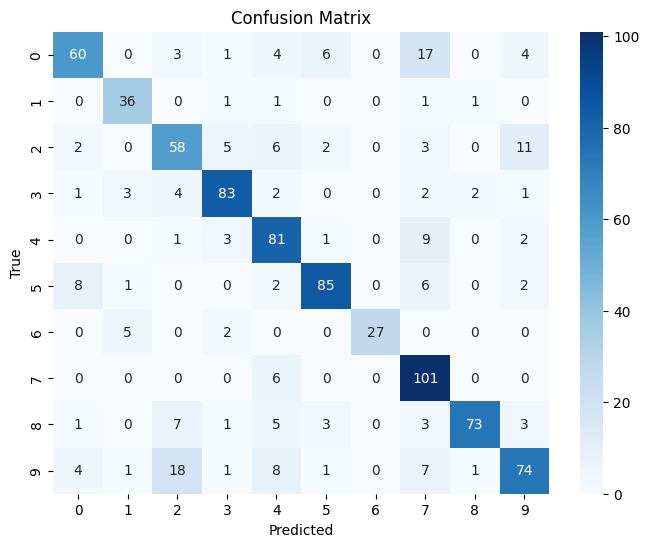

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()





